In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

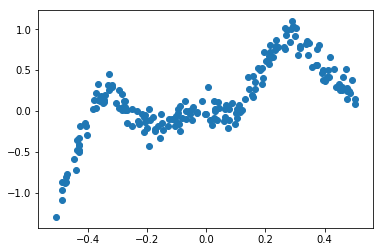

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

In [6]:
import mylibrary.nnlib as tnn

_______________________
epoch 0
Loss 0.05530892026423735

_______________________
epoch 100
Loss 0.04396230601724579

_______________________
epoch 200
Loss 0.04387401052784181

_______________________
epoch 300
Loss 0.03159138323660959

_______________________
epoch 400
Loss 0.02718805493202972

_______________________
epoch 500
Loss 0.026999976822037457

_______________________
epoch 600
Loss 0.02672493372847887

_______________________
epoch 700
Loss 0.026534012243383528

_______________________
epoch 800
Loss 0.026459077889042594

_______________________
epoch 900
Loss 0.026432239425125292

_______________________
epoch 1000
Loss 0.026418689602610224

_______________________
epoch 1100
Loss 0.026412758246467778

_______________________
epoch 1200
Loss 0.026419203590979556

_______________________
epoch 1300
Loss 0.026411548512095404

_______________________
epoch 1400
Loss 0.026409082504318997

_______________________
epoch 1500
Loss 0.02640815191396918

_______________________
epo

TclError: this isn't a Tk application

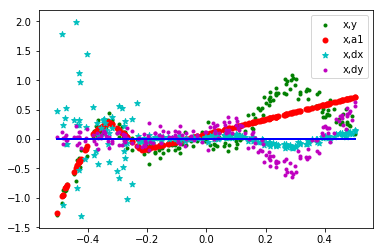

In [13]:
optimizer = tnn.Adam()
la1 = tnn.NonLinearLayer(1, 3, activation=tnn.LeakyRelu(), optimizer=optimizer)
la1a = tnn.NonLinearLayer(3, 3, activation=tnn.LeakyRelu(), optimizer=optimizer)
la2 = tnn.LinearLayer(3, 1, optimizer=optimizer)
resblock = tnn.AutoForm()
resblock.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    resout = resblock.forward(x_data)
    a1 = resout+x_data
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    
    dx = resblock.backward(dy)
    
    resblock.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

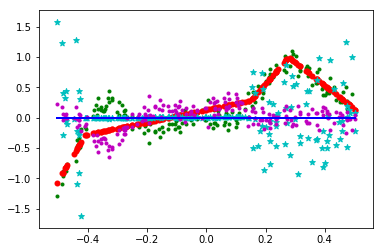

In [11]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

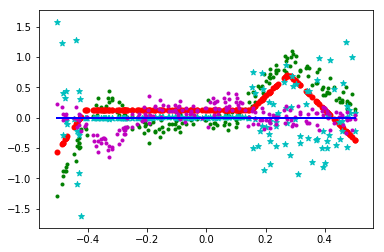

In [12]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, resout.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

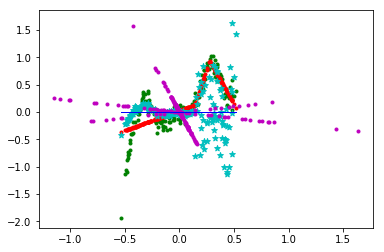

In [17]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(dx.reshape(-1), dy.reshape(-1), marker='.', c='m', lw=1, label='dx,dy')
# here is linear relationship between dx and dy

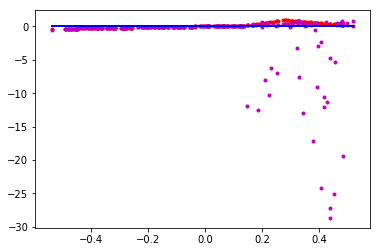

In [21]:
_a1 = resblock.forward(x_data - dx) + x_data
_dy = tnn.MseLoss.del_loss(_a1, y_data)
_dx = resblock.backward(_dy)

# plt.scatter(x, y, marker='.', c='g', label='x,y')
# plt.scatter(x, _dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
# plt.scatter(x, _dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1, label='x,a1')
plt.scatter(x, _a1.reshape(-1), marker='.', c='m', lw=1, label='x,_a1')
plt.plot(x, np.zeros_like(x), c='b', lw=2)